## Setup

In [1]:
import torch
import torchvision
import torchvision.transforms as T
import matplotlib.pyplot as plt
from EIANN import Network
import EIANN.utils as ut
import EIANN.plot as pt

from tqdm.notebook import tqdm
import numpy as np
import matplotlib.gridspec as gs
%load_ext autoreload
%autoreload 2

pt.update_plot_defaults()

# Load dataset
tensor_flatten = T.Compose([T.ToTensor(), T.Lambda(torch.flatten)])
MNIST_train_dataset = torchvision.datasets.MNIST(root='../datasets/MNIST_data/', train=True, download=False,
                                         transform=tensor_flatten)
MNIST_test_dataset = torchvision.datasets.MNIST(root='../datasets/MNIST_data/',
                                        train=False, download=False,
                                        transform=tensor_flatten)

# Add index to train & test data
MNIST_train = []
for idx,(data,target) in enumerate(MNIST_train_dataset):
    target = torch.eye(len(MNIST_train_dataset.classes))[target]
    MNIST_train.append((idx, data, target))
    
MNIST_test = []
for idx,(data,target) in enumerate(MNIST_test_dataset):
    target = torch.eye(len(MNIST_test_dataset.classes))[target]
    MNIST_test.append((idx, data, target))
    
# Put data in dataloader
data_generator = torch.Generator()
train_dataloader = torch.utils.data.DataLoader(MNIST_train, shuffle=True, generator=data_generator)
train_sub_dataloader = torch.utils.data.DataLoader(MNIST_train[0:10000], shuffle=True, generator=data_generator)
val_dataloader = torch.utils.data.DataLoader(MNIST_train[-10000:], batch_size=10000, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(MNIST_test, batch_size=10000, shuffle=False)

epochs = 1
data_seed = 0
network_seed = 42

# Backprop network

In [23]:
# Create network
network_name = "EIANN_1_hidden_mnist_backprop_relu_SGD_config.yaml"
network_config = ut.read_from_yaml(f'../config/MNIST/{network_name}')

layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

bp_network = Network(layer_config, projection_config, seed=network_seed, **training_kwargs)

In [27]:
# # Load pretrained network
# saved_network_path = f"saved_networks/{network_name}.pickle"
# bp_network.load(saved_network_path)

# pt.plot_batch_accuracy(bp_network, test_dataloader, population=bp_network.H1.E)
# pt.plot_rsm(bp_network,test_dataloader)

Epochs:   0%|          | 0/1 [00:00<?, ?it/s]

Samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Model saved to saved_networks/EIANN_1_hidden_mnist_backprop_relu_SGD_config.yaml.pkl
Batch accuracy = 93.33999633789062%


/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:612: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:642: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:208: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


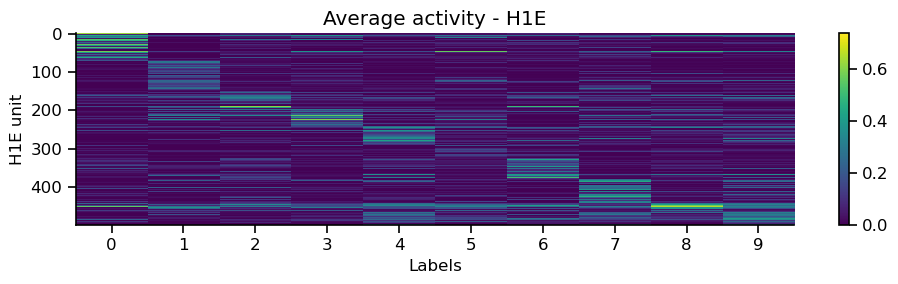

<Figure size 1000x300 with 0 Axes>

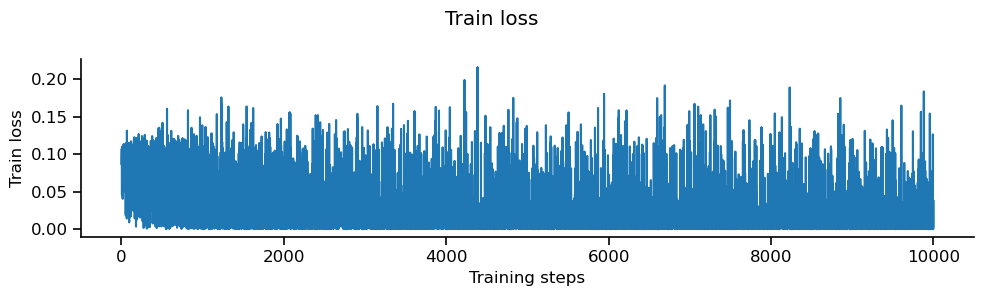

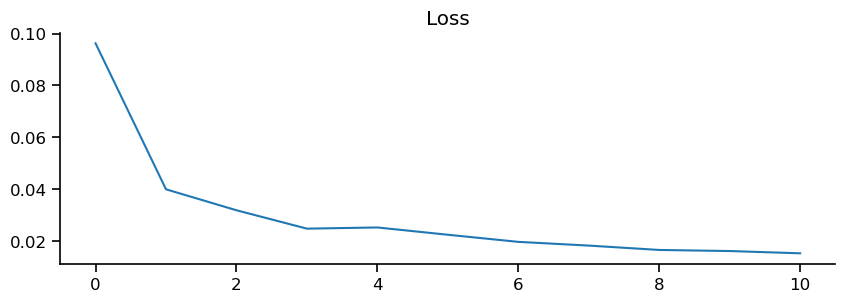

In [26]:
# Train network
data_generator.manual_seed(data_seed)
bp_network.train_and_validate(train_sub_dataloader, 
                              test_dataloader, 
                              epochs=epochs,
                              val_interval=(0,-1,1000),
                              store_history=True, 
                              store_weights=False,
                              status_bar=True)

bp_network.save(file_name_base=network_name)

pt.plot_batch_accuracy(bp_network, test_dataloader, population=bp_network.H1.E)
plt.figure()
pt.plot_train_loss_history(bp_network)
plt.show()

# pt.plot_test_loss_history(bp_network, test_dataloader, stepsize=50)
plt.figure()
plt.plot(bp_network.val_loss_history)
plt.title('Loss')
plt.show()

Computing tuning strength...
Generating plots...
W_min = -0.07880624383687973, W_max = 0.07297822833061218


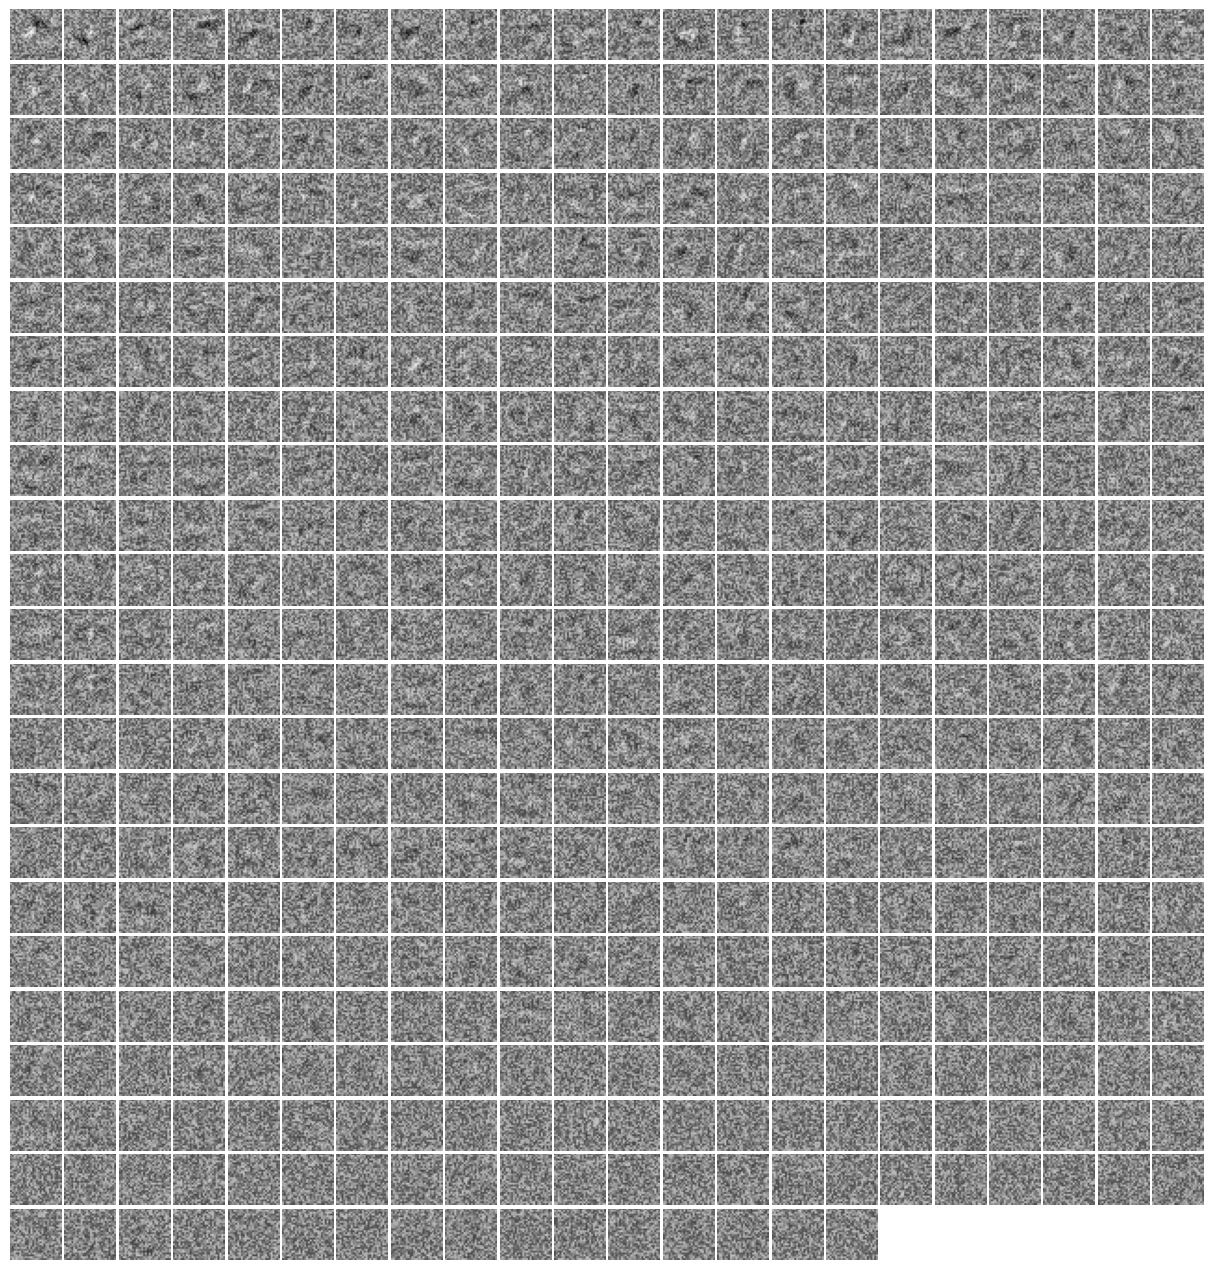

In [28]:
pt.plot_hidden_weights(bp_network.module_dict['H1E_InputE'].weight, sort=True) 

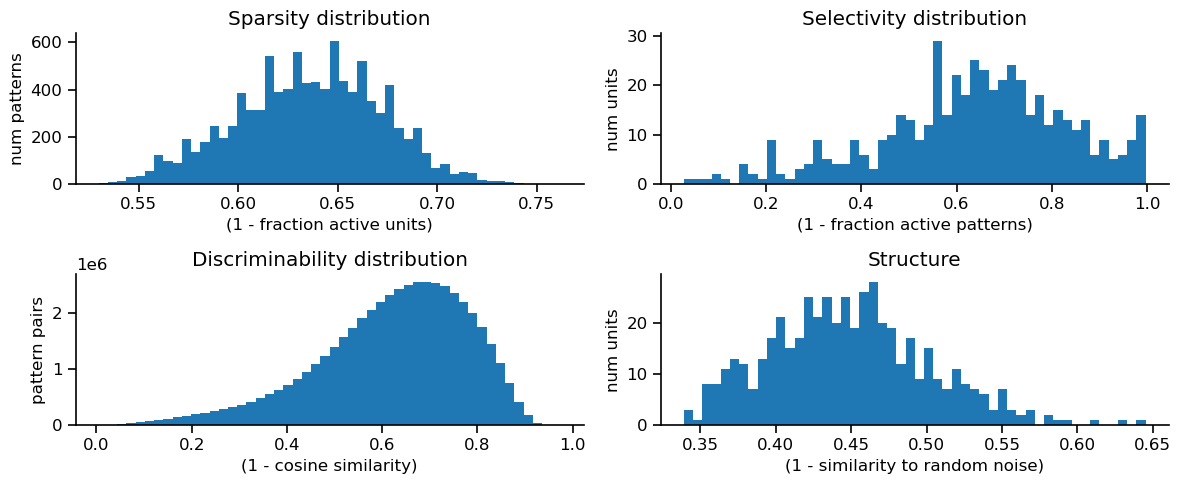

In [58]:
network = bp_network
weights = network.module_dict['H1E_InputE'].weight.detach()

# population = network.H1.E
# receptive_fields, _ = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=False)
metrics_dict = ut.compute_representation_metrics(network.H1.E, test_dataloader, receptive_fields=weights, plot=True)
metrics_dict['val_loss'] =  network.val_loss_history
metrics_dict['val_loss_steps'] = network.val_history_train_steps

ut.export_metrics_data(metrics_dict, network_name, path='saved_networks/model_metrics')

# Backprop Dale network

In [31]:
# Create network
# network_name = "EIANN_1_hidden_mnist_backprop_Dale_relu_SGD_config"
# network_config = ut.read_from_yaml(f'../config/MNIST/{network_name}.yaml')

network_name = "20230102_EIANN_1_hidden_mnist_bpDale_softplus_config.yaml"
network_config = ut.read_from_yaml(f'../optimize/data/mnist/{network_name}')

layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

bpDale_network = Network(layer_config, projection_config, seed=network_seed, **training_kwargs)

In [32]:
# # Load pretrained network
# saved_network_path = f"saved_networks/{network_name}.pickle"
# bpDale_network.load(saved_network_path)

# pt.plot_batch_accuracy(bpDale_network, test_dataloader, population=bpDale_network.H1.E)
# pt.plot_rsm(bpDale_network,test_dataloader)

Epochs:   0%|          | 0/1 [00:00<?, ?it/s]

Samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Model saved to saved_networks/20230102_EIANN_1_hidden_mnist_bpDale_softplus_config.yaml.pkl
Batch accuracy = 91.41000366210938%


/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:612: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:642: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:208: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1000x300 with 0 Axes>

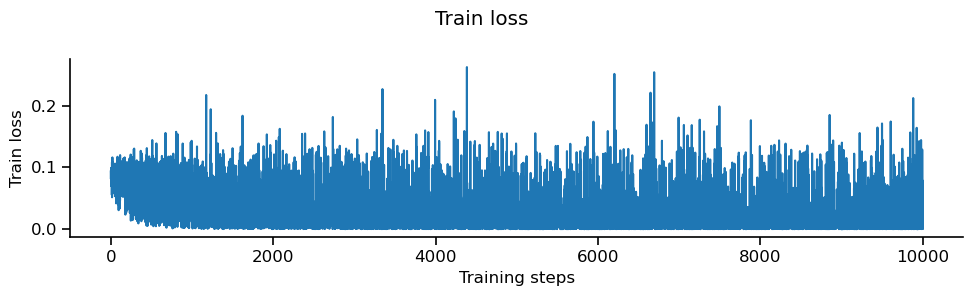

In [33]:
# Train network
data_generator.manual_seed(data_seed)
bpDale_network.train_and_validate(train_sub_dataloader, 
                              test_dataloader, 
                              epochs=epochs,
                              val_interval=(0,-1,1000),
                              store_history=True, 
                              store_weights=True,
                              status_bar=True)

bpDale_network.save(file_name_base=network_name)

pt.plot_batch_accuracy(bpDale_network, test_dataloader, population=bpDale_network.H1.E)
plt.figure()
pt.plot_train_loss_history(bpDale_network)
plt.show()

File already contains metrics for this model. Overwrite? (y/n)y


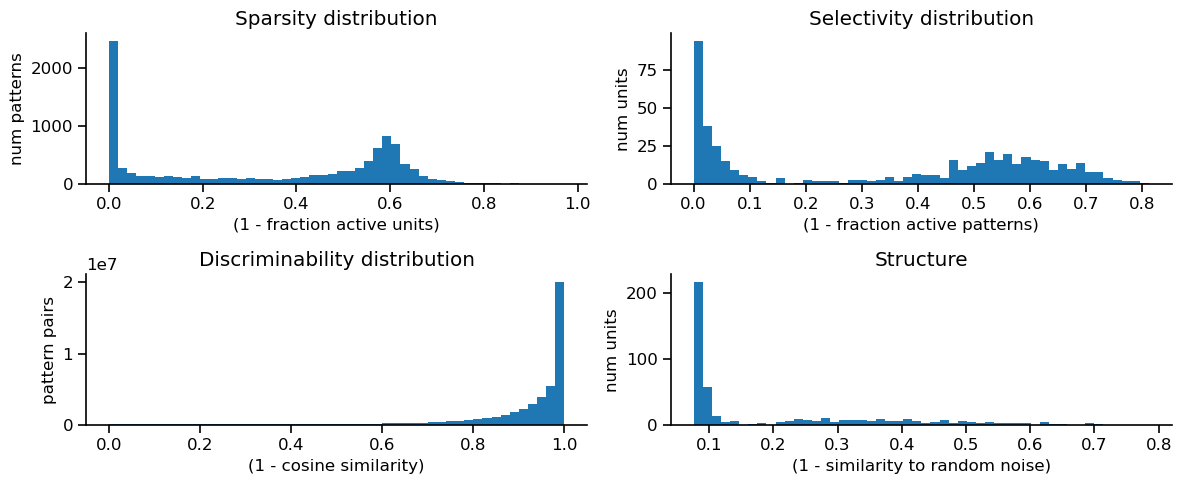

In [59]:
network = bpDale_network
weights = network.module_dict['H1E_InputE'].weight.detach()

# population = network.H1.E
# receptive_fields, _ = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=False)
metrics_dict = ut.compute_representation_metrics(network.H1.E, test_dataloader, receptive_fields=weights, plot=True)
metrics_dict['val_loss'] =  network.val_loss_history
metrics_dict['val_loss_steps'] = network.val_history_train_steps

ut.export_metrics_data(metrics_dict, network_name, path='saved_networks/model_metrics')

Computing tuning strength...
Generating plots...
W_min = 0.0, W_max = 0.19167248904705048


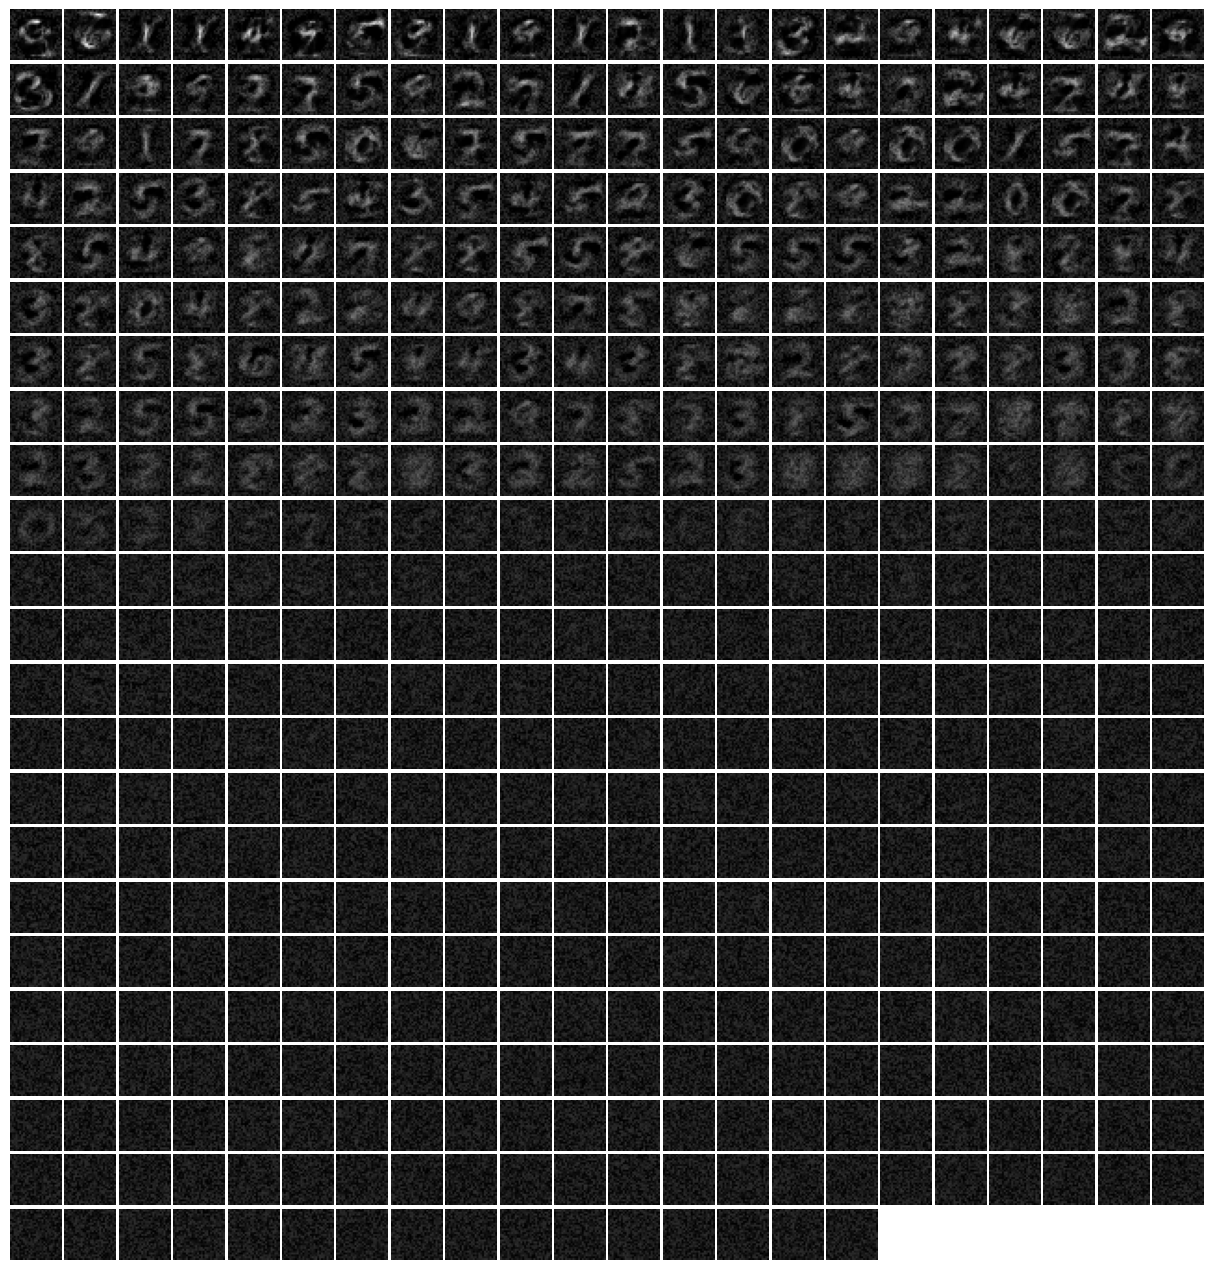

In [8]:
pt.plot_hidden_weights(bpDale_network.module_dict['H1E_InputE'].weight, sort=True)

In [9]:
weights = bpDale_network.module_dict['H1E_InputE'].weight.detach()
ut.compute_representation_metrics(bpDale_network.H1.E, test_dataloader, receptive_fields=weights, plot=True)

{'sparsity': 0.3409432,
 'selectivity': 0.3409432,
 'discriminability': 0.877472,
 'structure': 0.21401237156522201}

Optimizing receptive field images...


  0%|          | 0/10000 [00:00<?, ?it/s]

Optimizing receptive field images...


  0%|          | 0/10000 [00:00<?, ?it/s]

Min activity: 1.0059486627578735, Max activity: 4.632774829864502


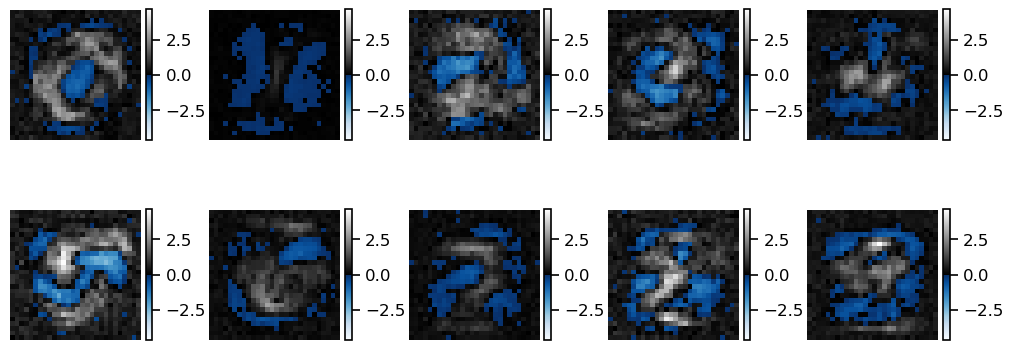

In [51]:
population = bpDale_network.Output.E
# receptive_fields, activity_preferred_inputs = ut.compute_act_weighted_avg(population, test_dataloader)
_, activity_preferred_inputs = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=True)
receptive_fields, _ = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=False)
pt.plot_receptive_fields(receptive_fields, activity_preferred_inputs)

In [14]:
population = bpDale_network.Output.FBI
# receptive_fields, activity_preferred_inputs = ut.compute_act_weighted_avg(population, test_dataloader)
_, activity_preferred_inputs = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=True)
receptive_fields, _ = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=False)
pt.plot_receptive_fields(receptive_fields, activity_preferred_inputs)

Optimizing receptive field images...


  0%|          | 0/10000 [00:00<?, ?it/s]

Optimizing receptive field images...


  0%|          | 0/10000 [00:00<?, ?it/s]

Min activity: 5.368416786193848, Max activity: 7.825984477996826


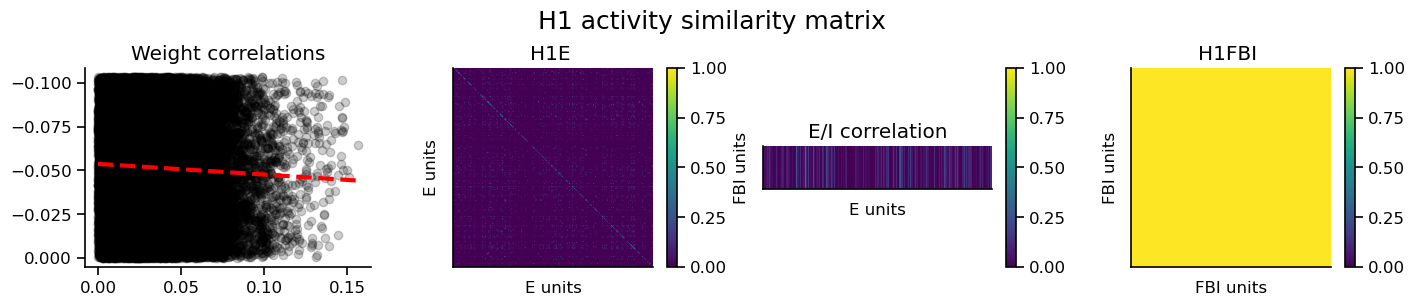

Pearson correlation: r=0.043, r^2=0.002, p=1.72E-20


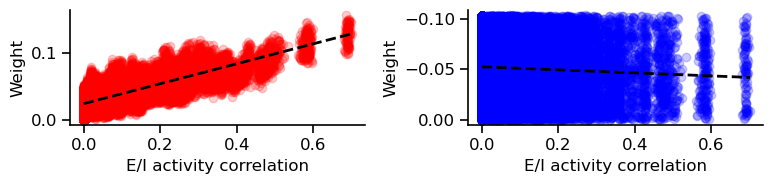

Pearson correlation (E): r=0.730, r^2=0.533, p=0.00E+00
Pearson correlation (I): r=0.052, r^2=0.003, p=3.82E-29


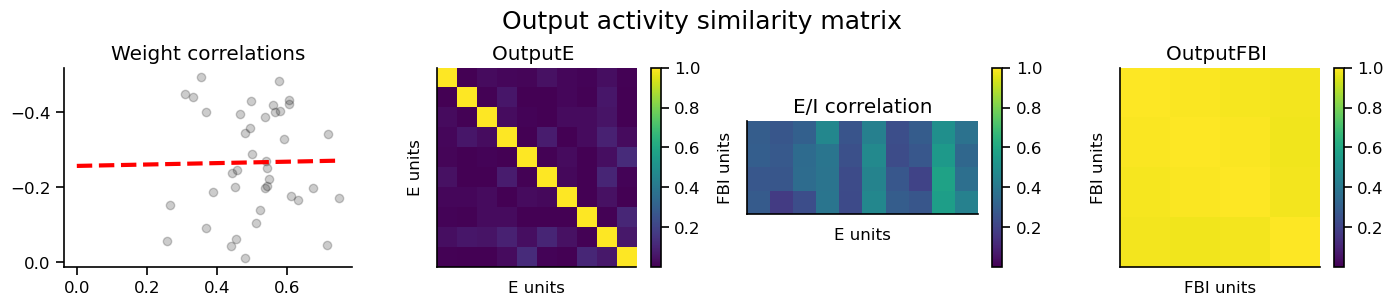

Pearson correlation: r=-0.016, r^2=0.000, p=9.23E-01


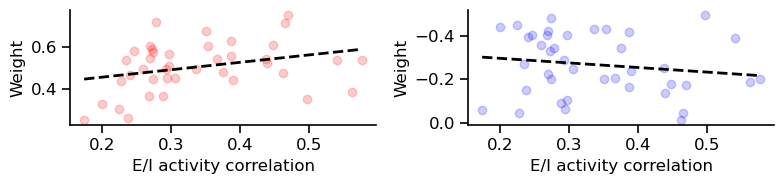

Pearson correlation (E): r=0.309, r^2=0.095, p=5.25E-02
Pearson correlation (I): r=0.157, r^2=0.025, p=3.33E-01


In [12]:
pt.plot_correlations(bpDale_network, test_dataloader)

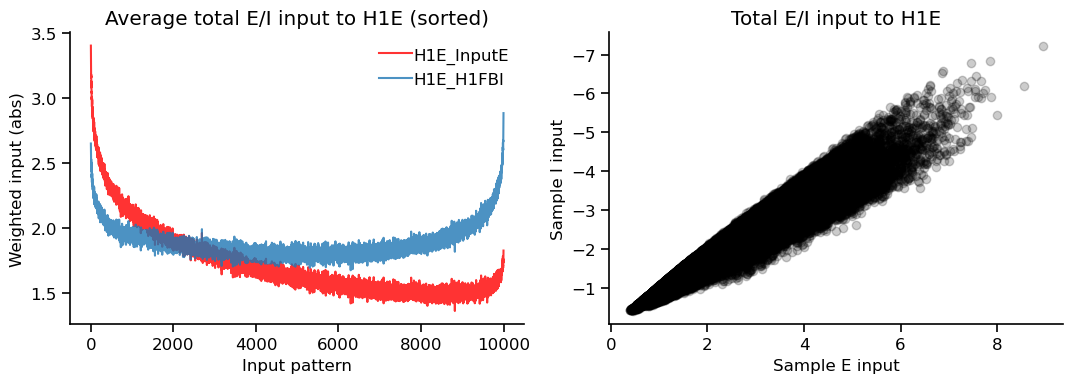

In [389]:
pt.plot_total_input(bpDale_network.H1.E, test_dataloader, sorting='EI_balance', act_threshold=0)

# Gjorgjieva Hebb network

In [35]:
# Create network
# network_name = "20230103_EIANN_1_hidden_mnist_Gjorgjieva_Hebb_config_B"
# network_config = ut.read_from_yaml('../optimize/data/20221229_EIANN_1_hidden_mnist_Gjorgjieva_Hebb_config.yaml')
# network_config = ut.read_from_yaml('../config/MNIST/EIANN_0_hidden_mnist_Gjorgjieva_Hebb_config.yaml')
# network_config = ut.read_from_yaml(f'../optimize/data/{network_name}.yaml')

network_name = '20230214_1_hidden_mnist_Supervised_Gjorgjieva_Hebb_C.yaml'
network_config = ut.read_from_yaml(f'../optimize/data/mnist/{network_name}')

layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

gj_network = Network(layer_config, projection_config, seed=network_seed, **training_kwargs)

In [36]:
# # Load pretrained network
# saved_network_path = f"saved_networks/{network_name}.pickle"
# gj_network.load(saved_network_path)

# pt.plot_batch_accuracy(gj_network, test_dataloader, population=gj_network.H1.E)
# pt.plot_rsm(gj_network,test_dataloader)

Epochs:   0%|          | 0/1 [00:00<?, ?it/s]

Samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Model saved to saved_networks/20230214_1_hidden_mnist_Supervised_Gjorgjieva_Hebb_C.yaml.pkl
Batch accuracy = 69.94000244140625%


/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:612: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:642: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:208: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


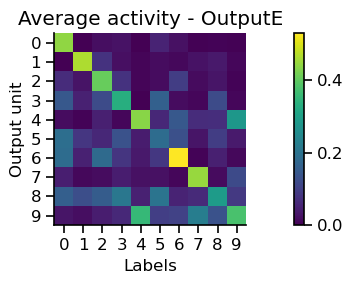

<Figure size 1000x300 with 0 Axes>

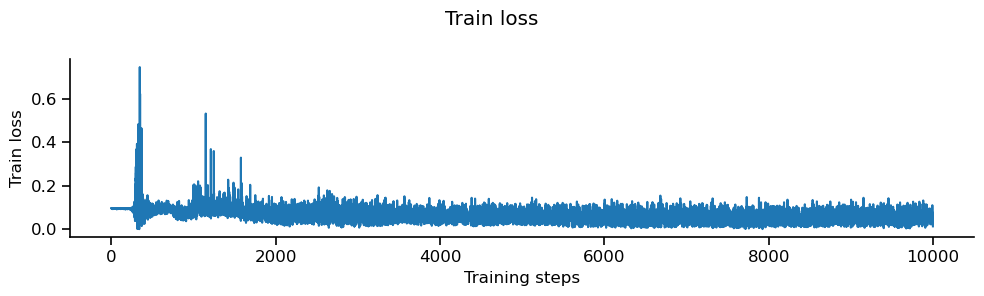

In [37]:
# Train network
data_generator.manual_seed(data_seed)
gj_network.train_and_validate(train_sub_dataloader, 
                              test_dataloader, 
                              epochs=epochs,
                              val_interval=(0,-1,1000),
                              store_history=True, 
                              store_weights=False, 
                              status_bar=True)

gj_network.save(file_name_base=network_name)

pt.plot_batch_accuracy(gj_network, test_dataloader, population=gj_network.H1.E)
plt.figure()
pt.plot_train_loss_history(gj_network)
plt.show()

In [60]:
network = gj_network
weights = network.module_dict['H1E_InputE'].weight.detach()

# population = network.H1.E
# receptive_fields, _ = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=False)
metrics_dict = ut.compute_representation_metrics(network.H1.E, test_dataloader, receptive_fields=weights, plot=True)
metrics_dict['val_loss'] =  network.val_loss_history
metrics_dict['val_loss_steps'] = network.val_history_train_steps

ut.export_metrics_data(metrics_dict, network_name, path='saved_networks/model_metrics')

File already contains metrics for this model. Overwrite? (y/n)y


Computing tuning strength...
Generating plots...
W_min = 1.679862195527737e-12, W_max = 0.03245251625776291


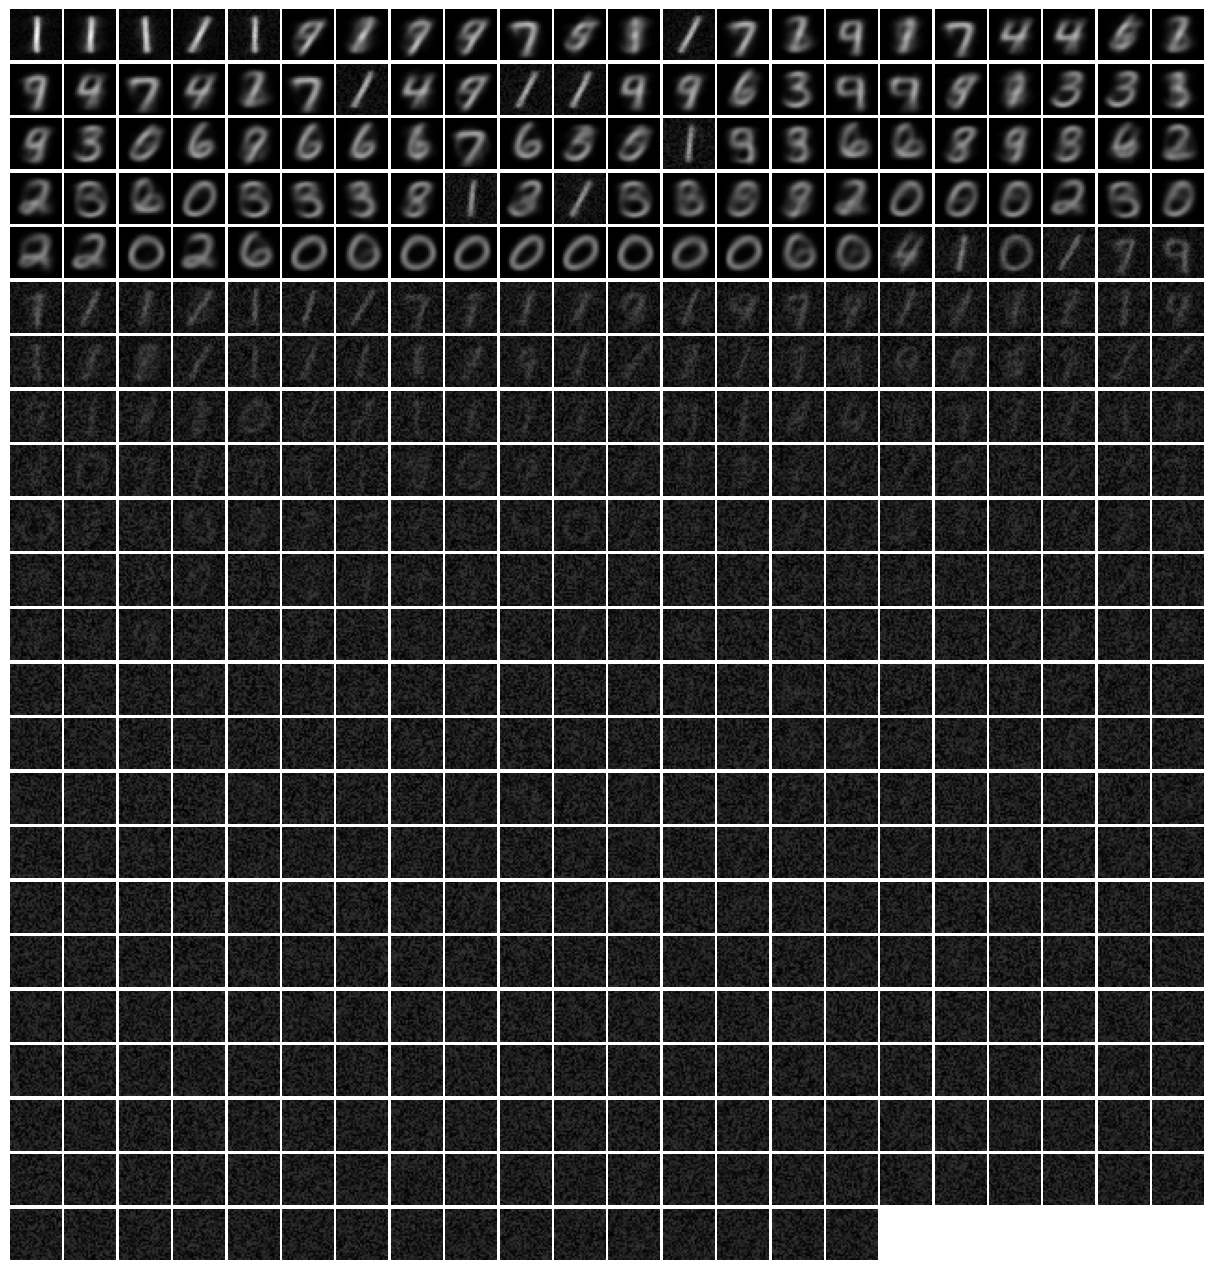

In [263]:
pt.plot_hidden_weights(gj_network.module_dict['H1E_InputE'].weight, sort=True)

Optimizing receptive field images...


  0%|          | 0/10000 [00:00<?, ?it/s]

Min activity: 0.16501730680465698, Max activity: 0.424085795879364


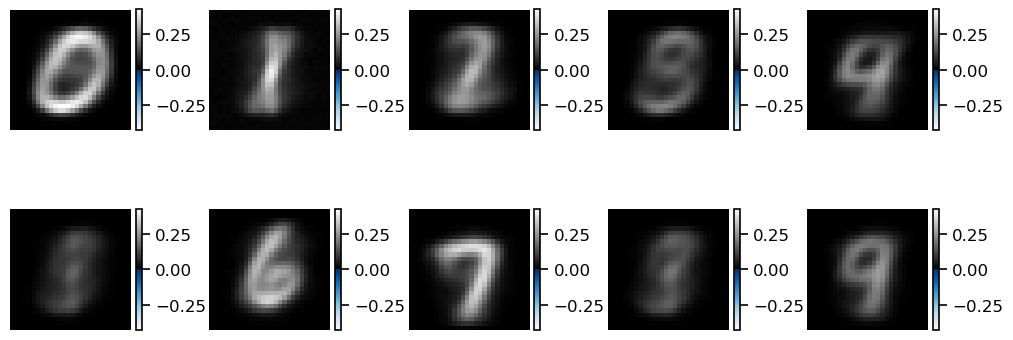

In [265]:
population = gj_network.Output.E
# receptive_fields, activity_preferred_inputs = ut.compute_act_weighted_avg(population, test_dataloader)
# _, activity_preferred_inputs = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=True)
receptive_fields, activity_preferred_inputs = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=False)
pt.plot_receptive_fields(receptive_fields, activity_preferred_inputs)

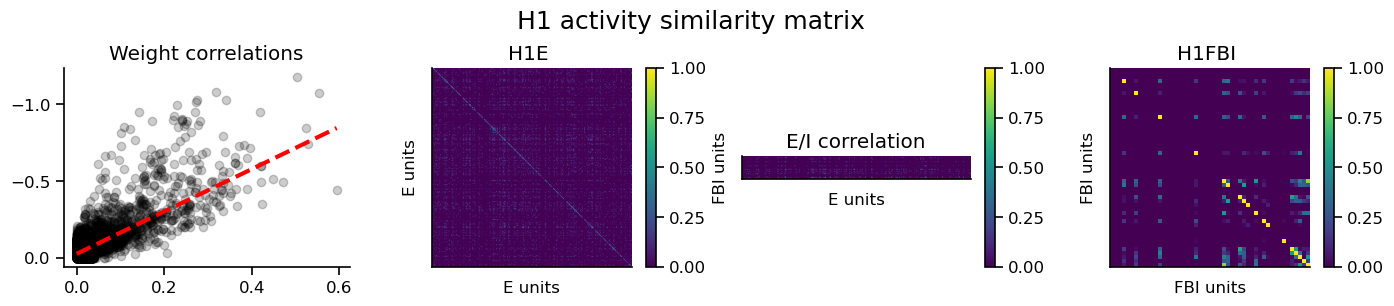

Pearson correlation: r=-0.643, r^2=0.413, p=0.00E+00


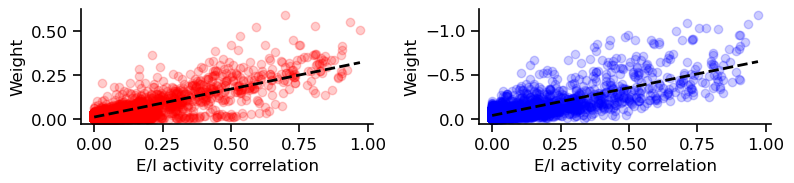

Pearson correlation (E): r=0.794, r^2=0.630, p=0.00E+00
Pearson correlation (I): r=-0.728, r^2=0.530, p=0.00E+00


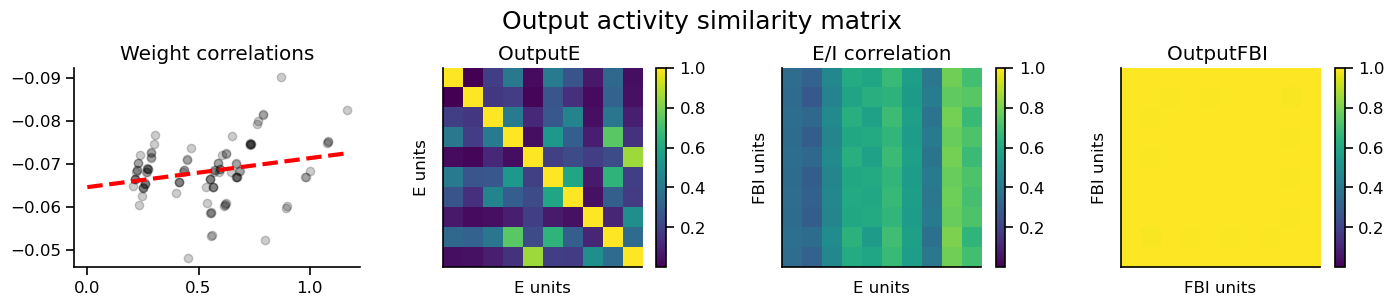

Pearson correlation: r=-0.248, r^2=0.061, p=1.29E-02


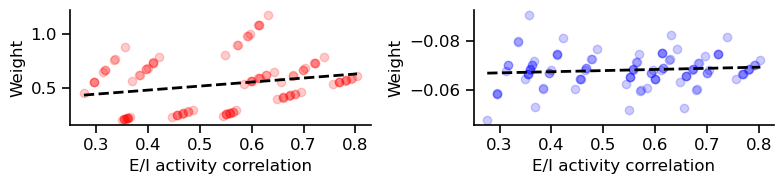

Pearson correlation (E): r=0.232, r^2=0.054, p=2.01E-02
Pearson correlation (I): r=-0.106, r^2=0.011, p=2.96E-01


In [266]:
pt.plot_correlations(gj_network, test_dataloader)

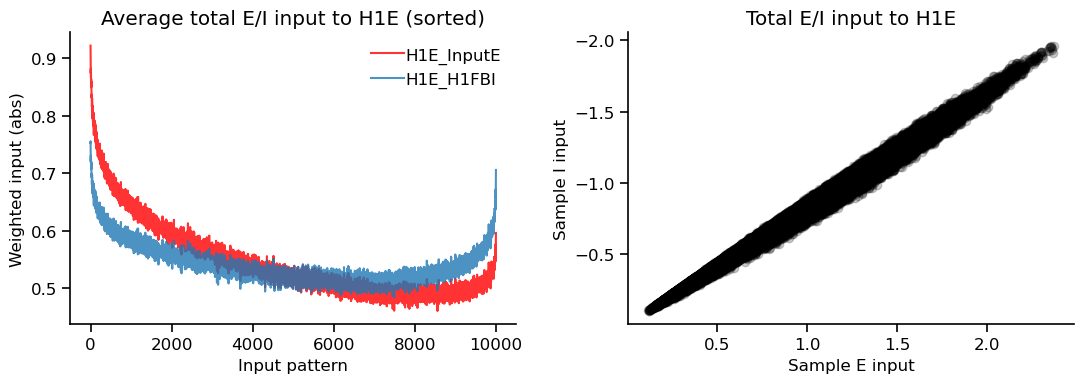

In [398]:
pt.plot_total_input(gj_network.H1.E, test_dataloader, sorting='EI_balance', act_threshold=0)

# BTSP network

In [7]:
# Create network
# network_name = "20230104_EIANN_1_hidden_mnist_BTSP_config_F"
# network_config = ut.read_from_yaml(f'../optimize/data/{network_name}.yaml')

# network_name = 'EIANN_1_hidden_mnist_BTSP_config'
# network_config = ut.read_from_yaml(f'../config/MNIST/{network_name}.yaml')

# network_name = '20230214_1_hidden_mnist_BTSP_Clone_Dend_I_1_bad.yaml'
network_name = '20230220_1_hidden_mnist_BTSP_Clone_Dend_I_4.yaml'
network_config = ut.read_from_yaml(f'../optimize/data/mnist/{network_name}')

# network_name = 'EIANN_1_hidden_mnist_BTSP_CloneDend.yaml'
# network_config = ut.read_from_yaml(f'../config/MNIST/{network_name}')

layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

btsp_network = Network(layer_config, projection_config, seed=network_seed, **training_kwargs)

In [8]:
# # Load pretrained network
# saved_network_path = f"saved_networks/{network_name}.pkl"
# # saved_network_path = f"saved_networks/{network_name}.pickle"
# # saved_network_path = f"saved_networks/{network_name}_early.pickle"

# btsp_network.load(saved_network_path)

# pt.plot_batch_accuracy(btsp_network, test_dataloader, population=btsp_network.H1.E)
# pt.plot_rsm(btsp_network,test_dataloader)

Epochs:   0%|          | 0/1 [00:00<?, ?it/s]

Samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Batch accuracy = 85.62999725341797%


/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:612: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:642: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:208: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


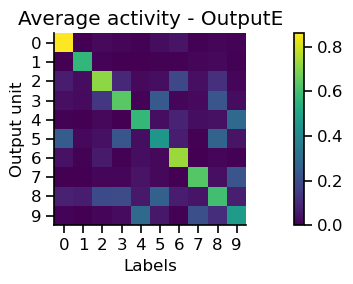

<Figure size 1000x300 with 0 Axes>

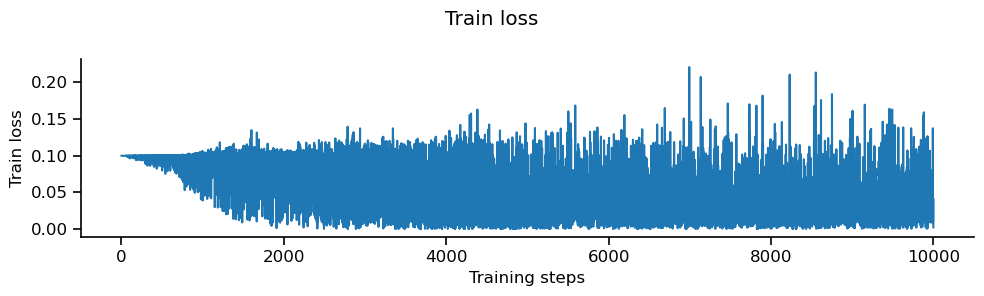

/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:669: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(0, num_labels))
/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:670: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(range(0, num_labels))


Model saved to saved_networks/20230220_1_hidden_mnist_BTSP_Clone_Dend_I_4.yaml.pkl


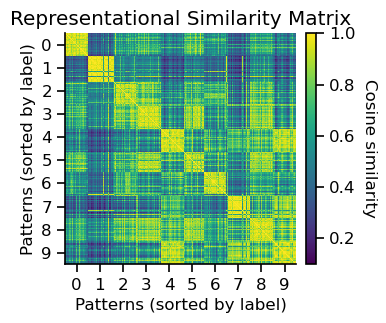

In [9]:
# Train network
data_generator.manual_seed(data_seed)
btsp_network.train_and_validate(train_sub_dataloader, 
                                test_dataloader, 
                                epochs=epochs,
                                val_interval=(0,-1,1000),
                                store_history=True, 
                                store_weights=False, 
                                status_bar=True)

pt.plot_batch_accuracy(btsp_network, test_dataloader, population=btsp_network.H1.E)
plt.figure()
pt.plot_train_loss_history(btsp_network)
plt.show()
pt.plot_rsm(btsp_network,test_dataloader)

btsp_network.save(file_name_base=network_name)

Computing tuning strength...
Generating plots...
W_min = 1.5967402955396892e-09, W_max = 0.03222929313778877


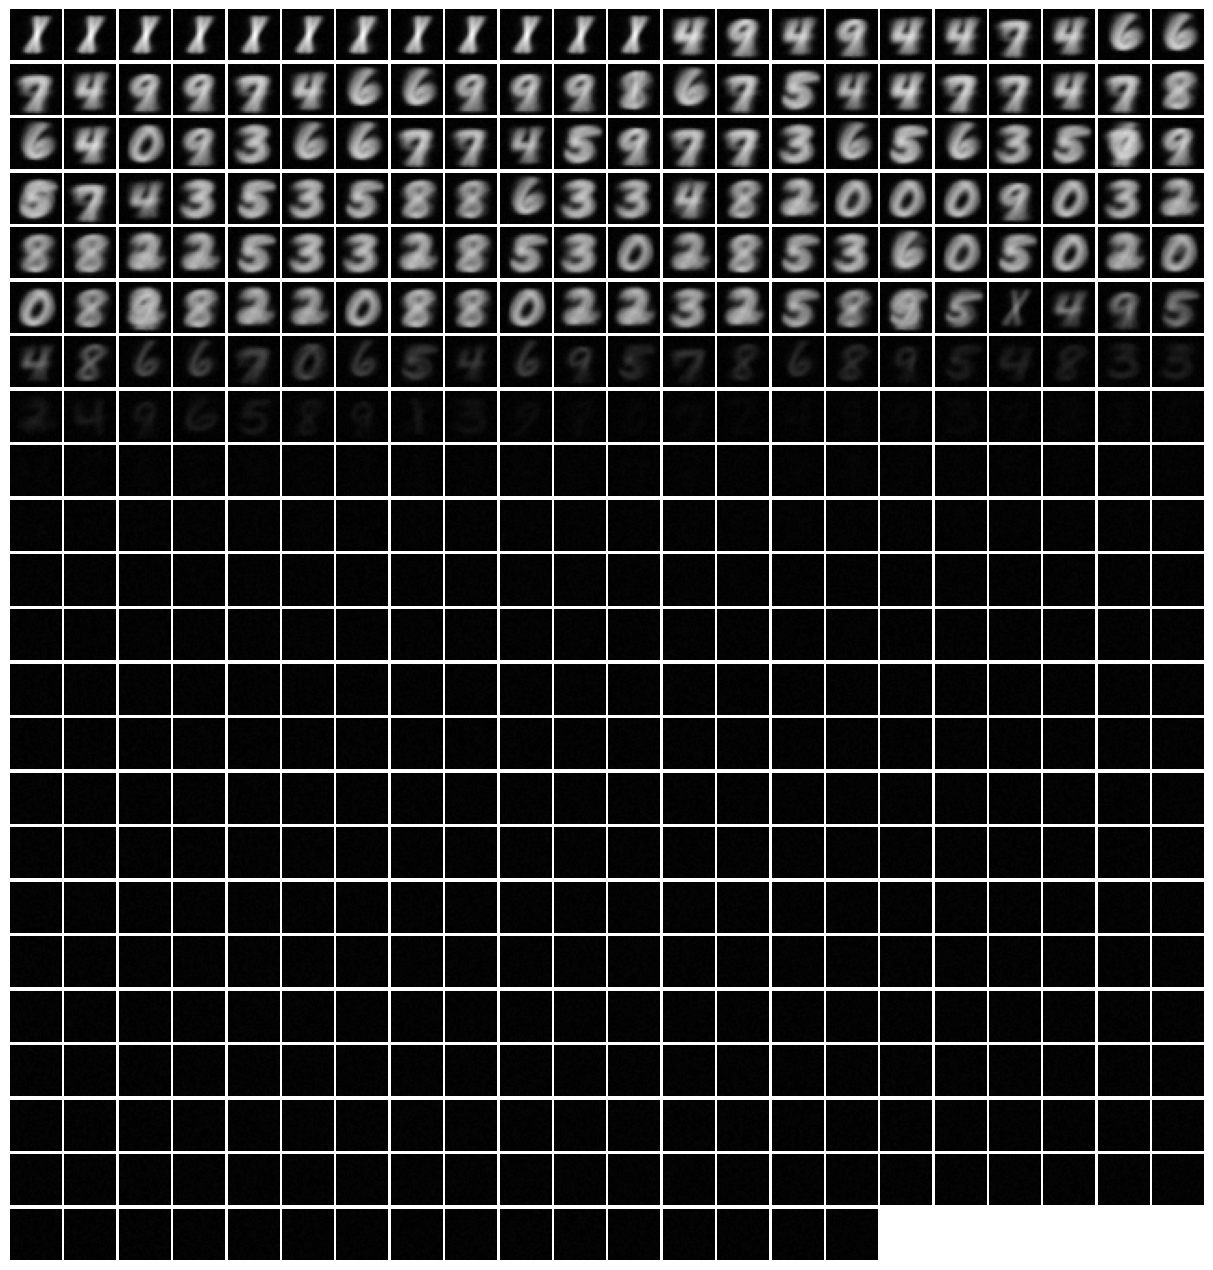

In [10]:
pt.plot_hidden_weights(btsp_network.module_dict['H1E_InputE'].weight, sort=True)

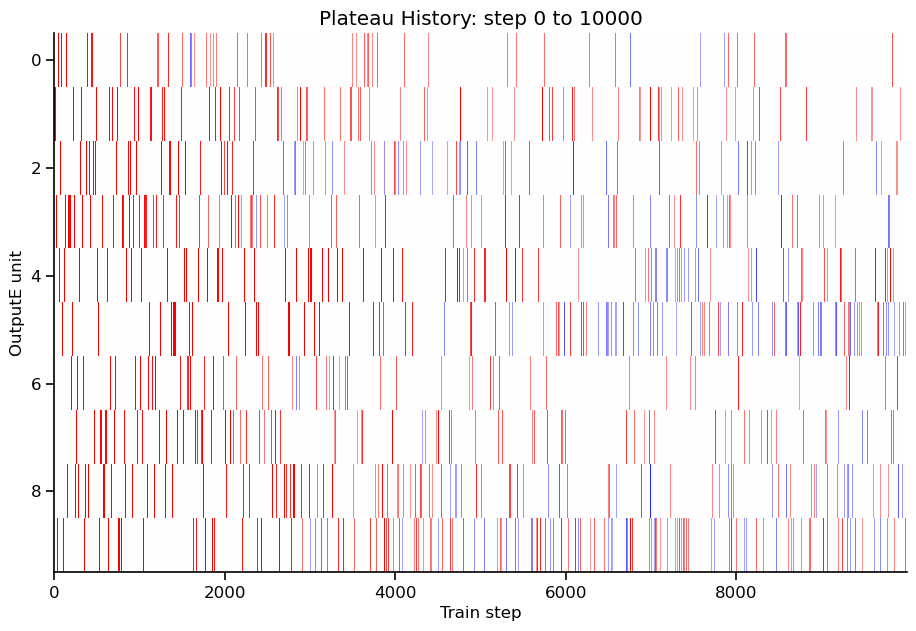

In [11]:
pt.plot_plateaus(population=btsp_network.Output.E, start=0, end=10000)

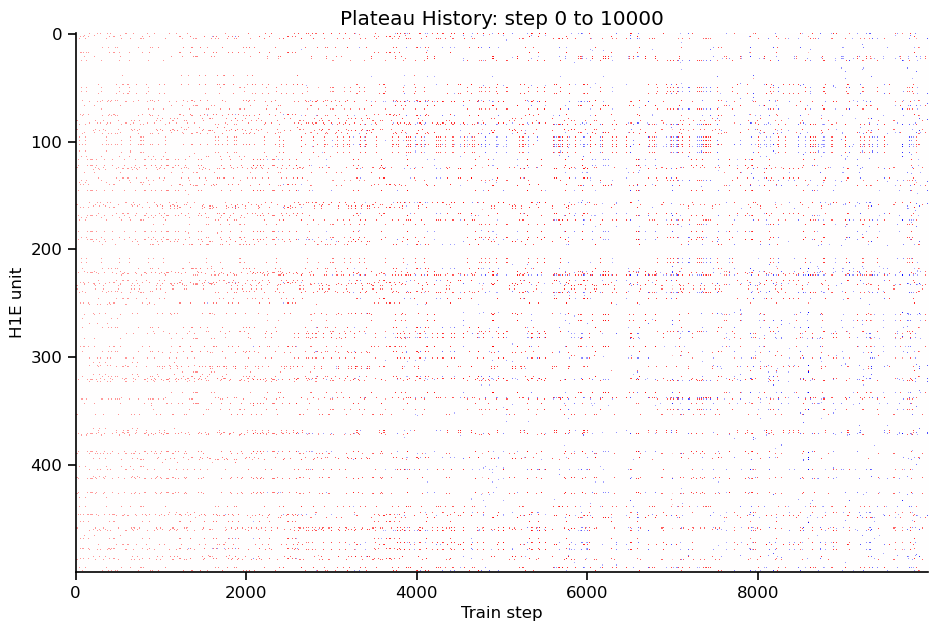

In [12]:
pt.plot_plateaus(population=btsp_network.H1.E, start=0, end=10000)

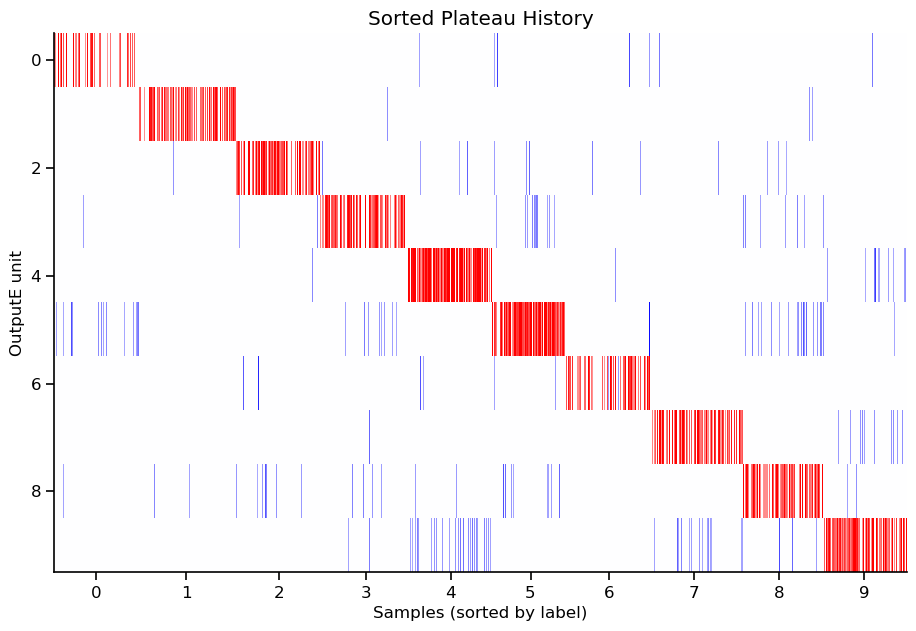

In [13]:
sorted_plateaus, unit_ids = pt.plot_sorted_plateaus(btsp_network.Output.E, test_dataloader)

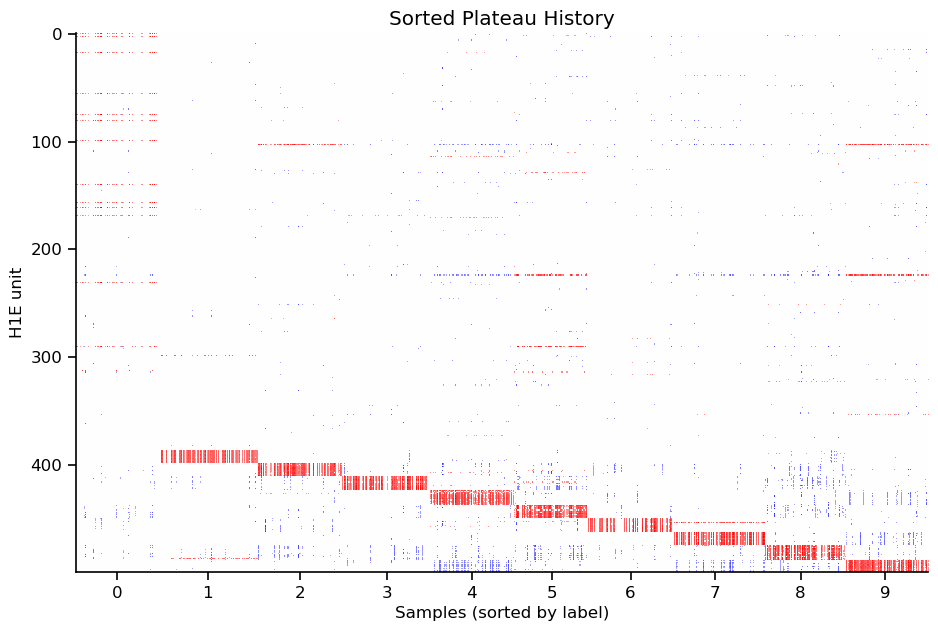

In [14]:
sorted_plateaus, unit_ids = pt.plot_sorted_plateaus(btsp_network.H1.E, test_dataloader)

File already contains metrics for this model. Overwrite? (y/n)y


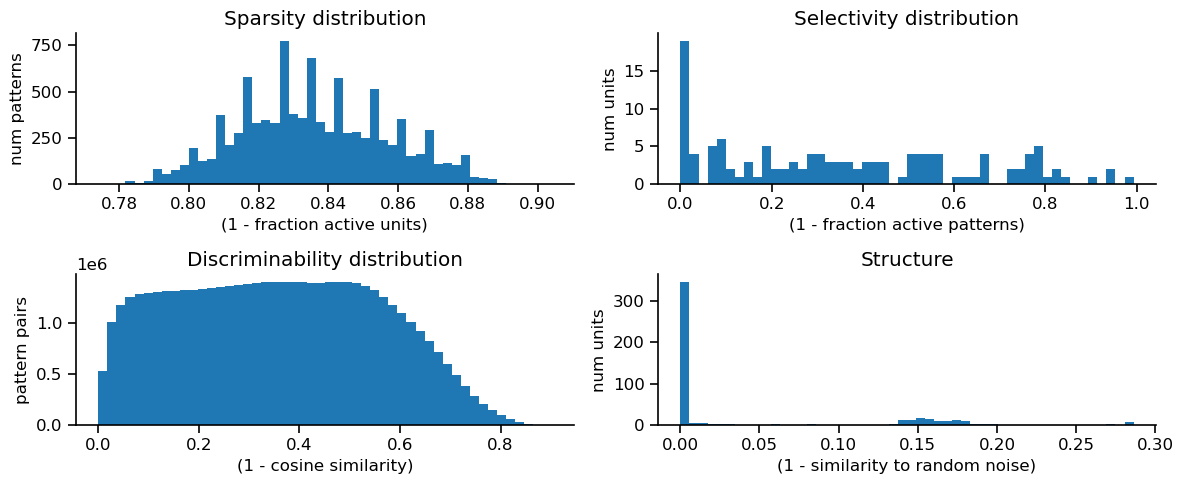

In [61]:
network = btsp_network
weights = network.module_dict['H1E_InputE'].weight.detach()

# population = network.H1.E
# receptive_fields, _ = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=False)
metrics_dict = ut.compute_representation_metrics(network.H1.E, test_dataloader, receptive_fields=weights, plot=True)
metrics_dict['val_loss'] =  network.val_loss_history
metrics_dict['val_loss_steps'] = network.val_history_train_steps

ut.export_metrics_data(metrics_dict, network_name, path='saved_networks/model_metrics')

In [147]:
# pt.plot_hidden_weight_history(btsp_network, unit=368)

In [15]:
population = btsp_network.Output.E
_, activity_preferred_inputs = ut.compute_act_weighted_avg(population, test_dataloader)
# _, activity_preferred_inputs = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=True)
receptive_fields, _ = ut.compute_maxact_receptive_fields(population, test_dataloader, sigmoid=False)
pt.plot_receptive_fields(receptive_fields, activity_preferred_inputs)

Optimizing receptive field images...


  0%|          | 0/10000 [00:00<?, ?it/s]

Min activity: 0.48158198595046997, Max activity: 0.9709281921386719


/var/folders/q9/g15z8pxs2fd8tgyd9ggfv1c8x5w4qx/T/ipykernel_47104/279513344.py:1: RankWarning: Polyfit may be poorly conditioned
  pt.plot_correlations(btsp_network, test_dataloader)
/Users/ag1880/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


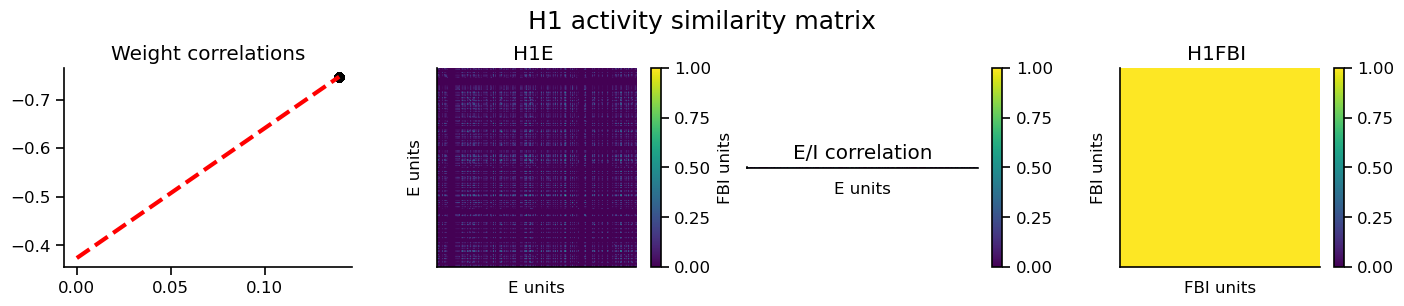

Pearson correlation: r=nan, r^2=nan, p=NAN


Pearson correlation (E): r=nan, r^2=nan, p=NAN
Pearson correlation (I): r=nan, r^2=nan, p=NAN


/var/folders/q9/g15z8pxs2fd8tgyd9ggfv1c8x5w4qx/T/ipykernel_47104/279513344.py:1: RankWarning: Polyfit may be poorly conditioned
  pt.plot_correlations(btsp_network, test_dataloader)
/Users/ag1880/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Pearson correlation: r=nan, r^2=nan, p=NAN


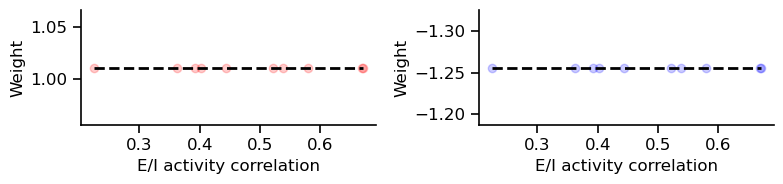

Pearson correlation (E): r=nan, r^2=nan, p=NAN
Pearson correlation (I): r=nan, r^2=nan, p=NAN


In [16]:
pt.plot_correlations(btsp_network, test_dataloader)

In [17]:
pt.plot_total_input(btsp_network.H1.E, test_dataloader, sorting='EI_balance', act_threshold=0)